In [2]:
# %pip install matplotlib
# %pip install seaborn
# %pip install textwrap3
# %pip install scipy
# %pip install plotly
# %pip install --upgrade nbformat

import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import trim_mean


In [3]:
df = pd.read_csv('WorldBank.csv')
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


##### Since many underdeveloped and poor countries lack the resources to conduct thorough surveys, a small amount of data is missing. This creates a bias in our project known as "selection bias." Selection bias occurs when certain segments of the population are systematically excluded from the sample, leading to skewed or inaccurate results.

## Data Cleaning

1. The data had a lot of missing cells and an unecessary column. First, we dropped the 'Country Code' column, as it was irrelvent.
2. Then, while examining the data, we noticed that the column of 'GDP (USD)' had numbers of huge magnitude and working on these numbers would be time consuming. So I changes it to 'GDP in billions' to ease the calculations. 
3. To maintain a reference point and ensure data integrity, I created a savepoint by exporting the partially filtered dataset into a CSV file.
4. In the final and the most important step of cleaning the data, I intially decided to take the average of every column and replace the missing cells with the average of its respective column. But given the fact that the data is a real-life data and all of the parameters in this data set are either increasing or decreasing with time, it was unpractical to replace the missing cells with the world average. So, I chose the closest point (from the same country) to the missing data and then replaced the missing point by this closest point. If no data was present for a single year for a country, only then I replaced it with the world average value. 
5. Finally, after making all these changes, I saved this as cleaned_data.csv file.

In [4]:
df.drop(columns=['Country Code'], inplace=True)
df.head()

,Country Name,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


In [5]:
# Divide all entries in the 'GDP (USD)' column by 10^9
df['GDP (USD)'] /= 10**9

# Rename the column to 'GDP (USD in billions)'
df.rename(columns={'GDP (USD)': 'GDP (USD in billions)'}, inplace=True)
df.head()

,Country Name,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD in billions),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,South Asia,Low income,2018,NaN,NaN,NaN,19.3630,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,South Asia,Low income,2017,33.211,6.575,NaN,20.1918,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,South Asia,Low income,2016,33.981,6.742,NaN,19.3626,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,South Asia,Low income,2015,34.809,6.929,NaN,19.9071,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,South Asia,Low income,2014,35.706,7.141,NaN,20.4849,613.856,7.00,55.1,62.966,51.1148,1.735


In [6]:
# Filter out rows with year < 1980
filtered_df = df[df['Year'] >= 1980]

# Only rich and developed countries had complete data between the year 1960 and 1980. So, I considered deleting this data.

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_data.csv', index=False)

filtered_df.head()

,Country Name,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD in billions),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,South Asia,Low income,2018,NaN,NaN,NaN,19.3630,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,South Asia,Low income,2017,33.211,6.575,NaN,20.1918,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,South Asia,Low income,2016,33.981,6.742,NaN,19.3626,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,South Asia,Low income,2015,34.809,6.929,NaN,19.9071,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,South Asia,Low income,2014,35.706,7.141,NaN,20.4849,613.856,7.00,55.1,62.966,51.1148,1.735


In [7]:
def replace_null_with_average(df, column_name):
    # Calculate the average of non-null values in the column
    average_value = df[column_name].mean()

    # Replace null cells with the average value
    df.loc[:, column_name] = df[column_name].fillna(average_value).round(3)
    return df

def fill_missing_values(df, column_name):
    # Iterate over each country
    for country_name in df['Country Name'].unique():
        # Filter rows for the current country
        country_data = df[df['Country Name'] == country_name]

        # Find the nearest non-null value
        nearest_value = None
        for index, row in country_data.iterrows():
            if not pd.isnull(row[column_name]):
                nearest_value = row[column_name]
                break

        # Replace missing values with the nearest non-null value
        for index, row in country_data.iterrows():
            if pd.isnull(row[column_name]):
                df.at[index, column_name] = nearest_value
            else:
                nearest_value = row[column_name]  # Update nearest value

    # Round the column to 3 decimal places
    df.loc[:, column_name] = df[column_name].round(3)
    return df

In [8]:
for column_name in df.columns[4:]:
    filtered_df = fill_missing_values(filtered_df, column_name)
    filtered_df = replace_null_with_average(filtered_df, column_name)

In [9]:
filtered_df.to_csv('cleaned_data.csv', index=False)

## Data Visualization and Analysis


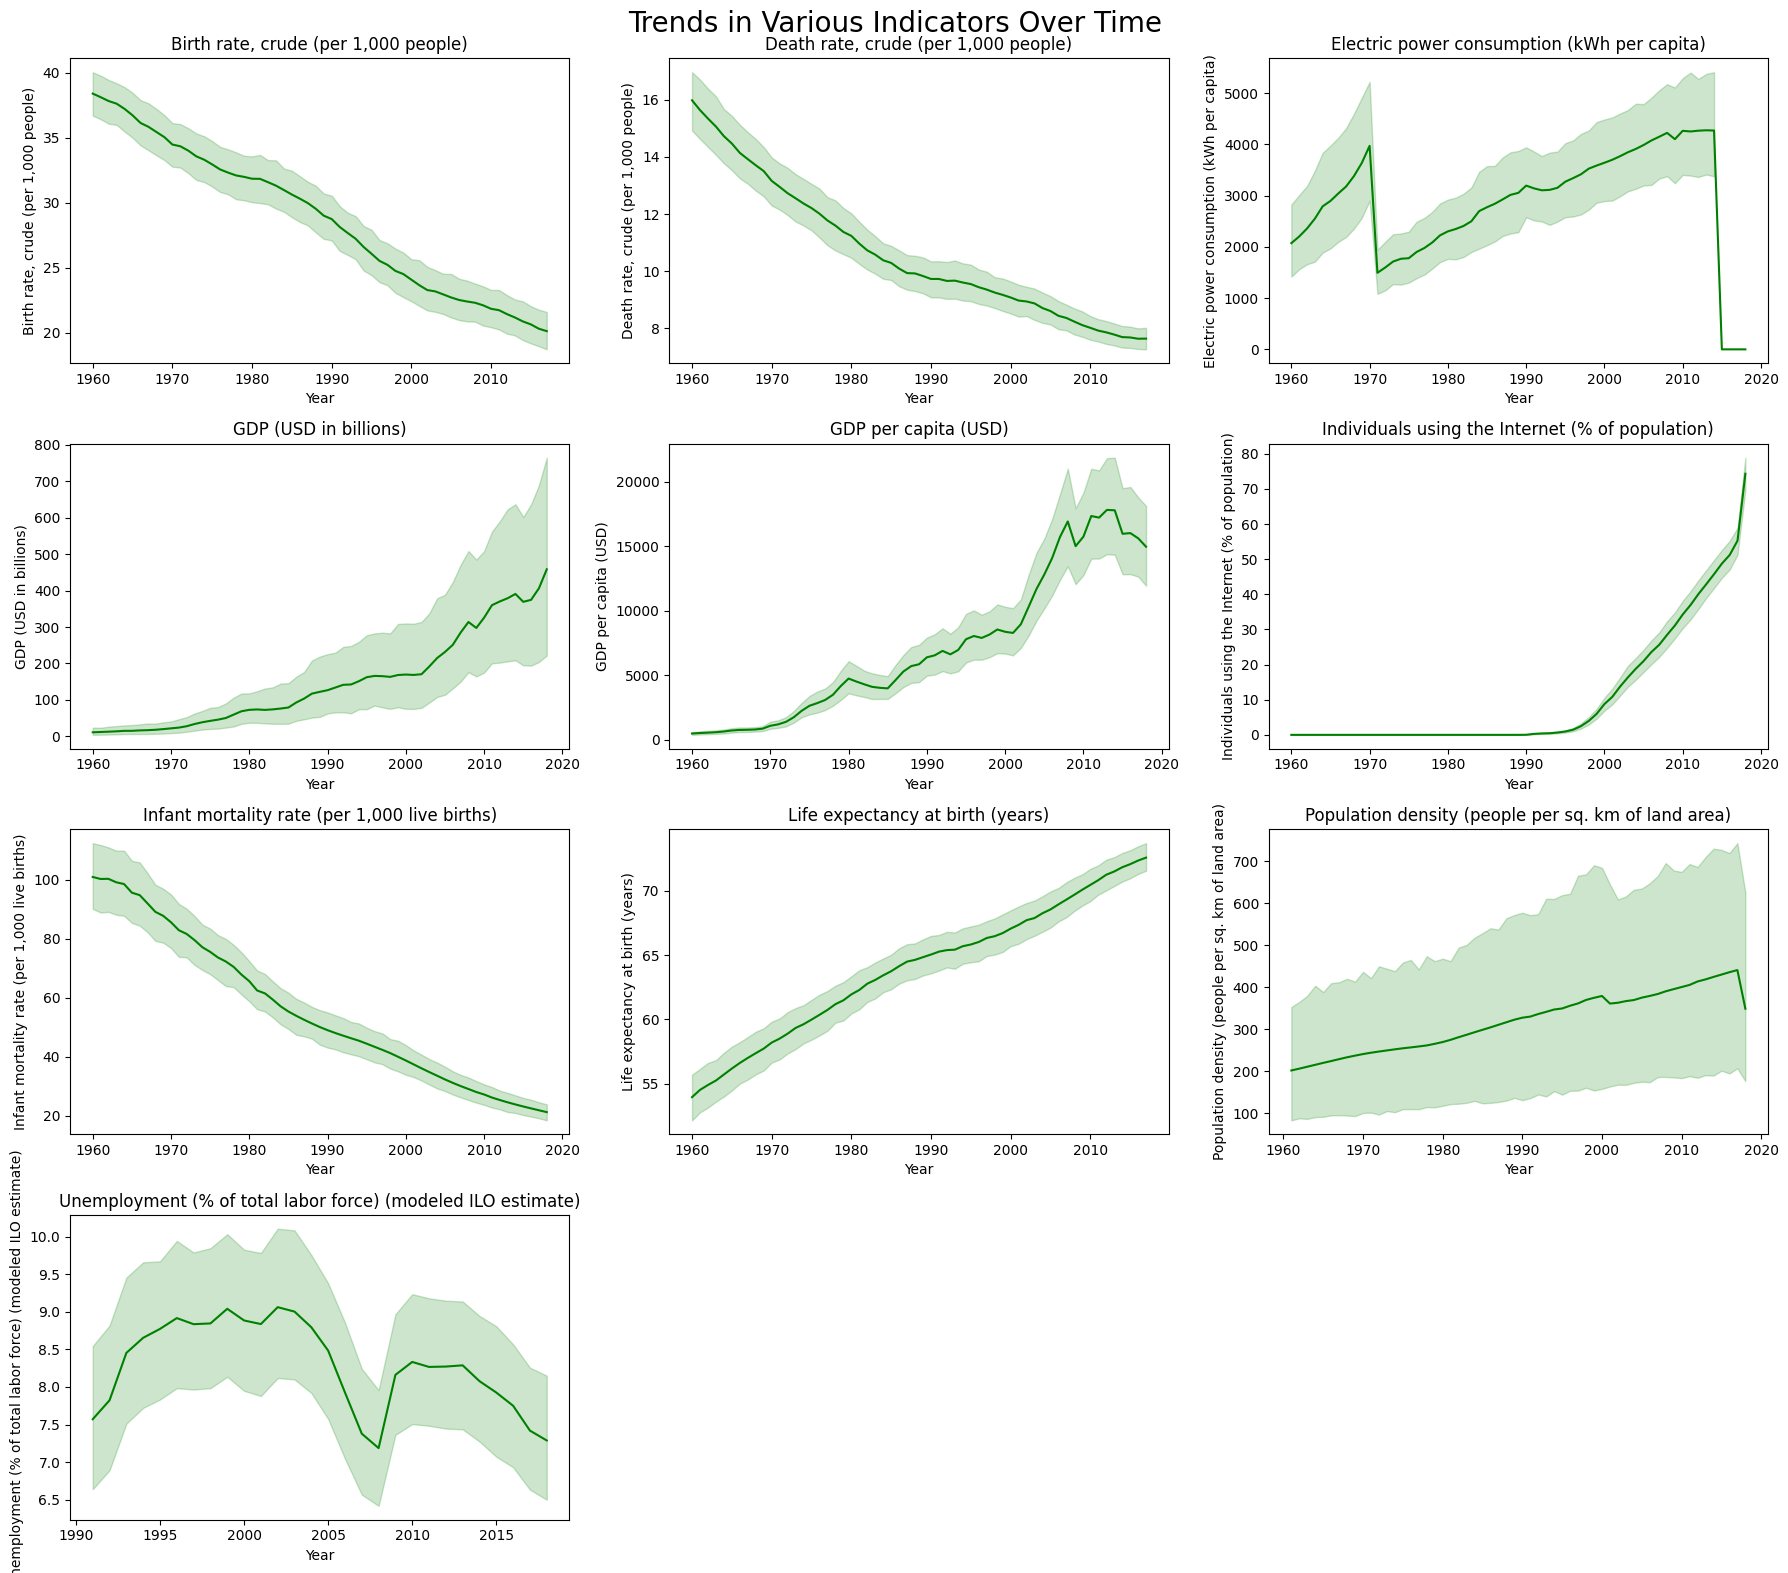

In [10]:
# Columns to plot
columns_to_plot = ['Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)',
                   'Electric power consumption (kWh per capita)', 'GDP (USD in billions)',
                   'GDP per capita (USD)', 'Individuals using the Internet (% of population)',
                   'Infant mortality rate (per 1,000 live births)', 'Life expectancy at birth (years)',
                   'Population density (people per sq. km of land area)',
                   'Unemployment (% of total labor force) (modeled ILO estimate)']

# Number of rows and columns for the subplots grid
num_rows = 4
num_cols = 3

# Create subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 16))

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over columns and plot against 'Year'
for i, column in enumerate(columns_to_plot):
    sns.lineplot(x='Year', y=column, data=df, ax=axes[i], color='green')
    axes[i].set_title(column)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(column)

# Remove empty subplots
for i in range(10, 12):
    fig.delaxes(axes.flatten()[i])

fig.suptitle('Trends in Various Indicators Over Time', fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()


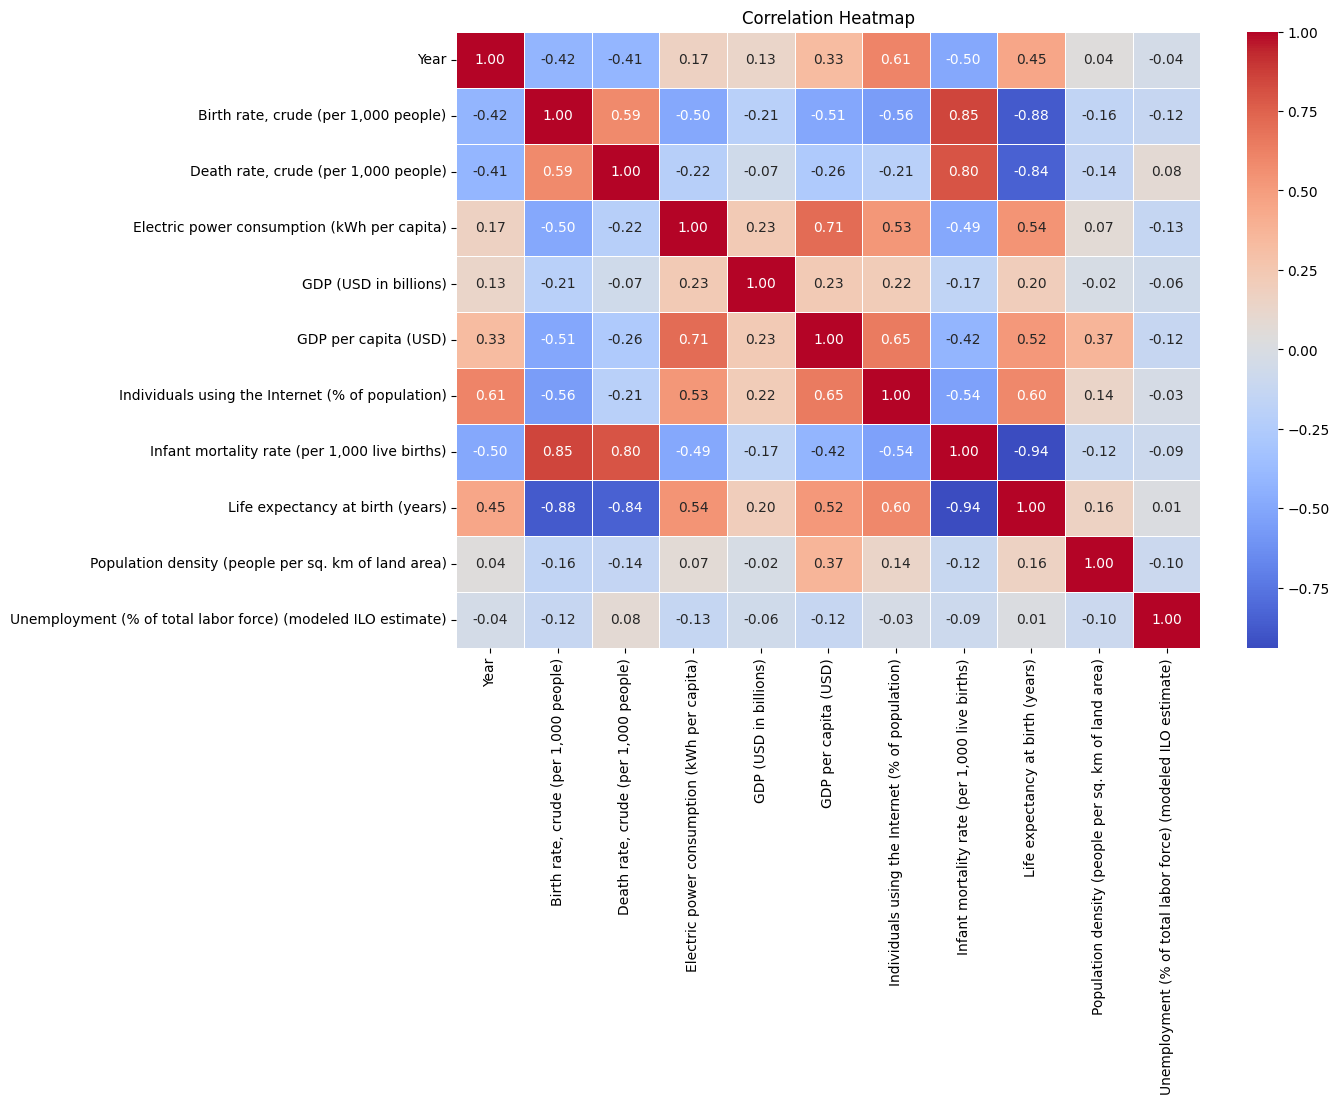

In [11]:
# Select numerical columns for correlation heatmap
numerical_columns = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

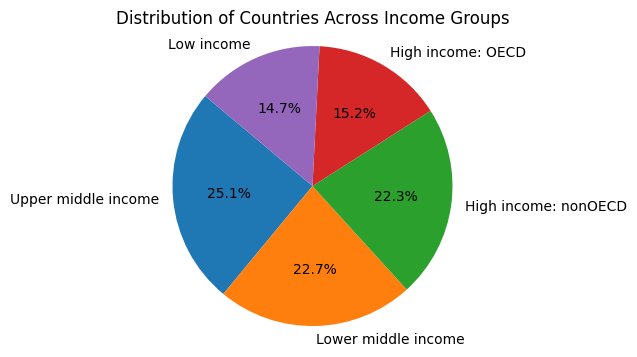

In [12]:
# Count the number of countries in each income group
income_group_counts = df['IncomeGroup'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Countries Across Income Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

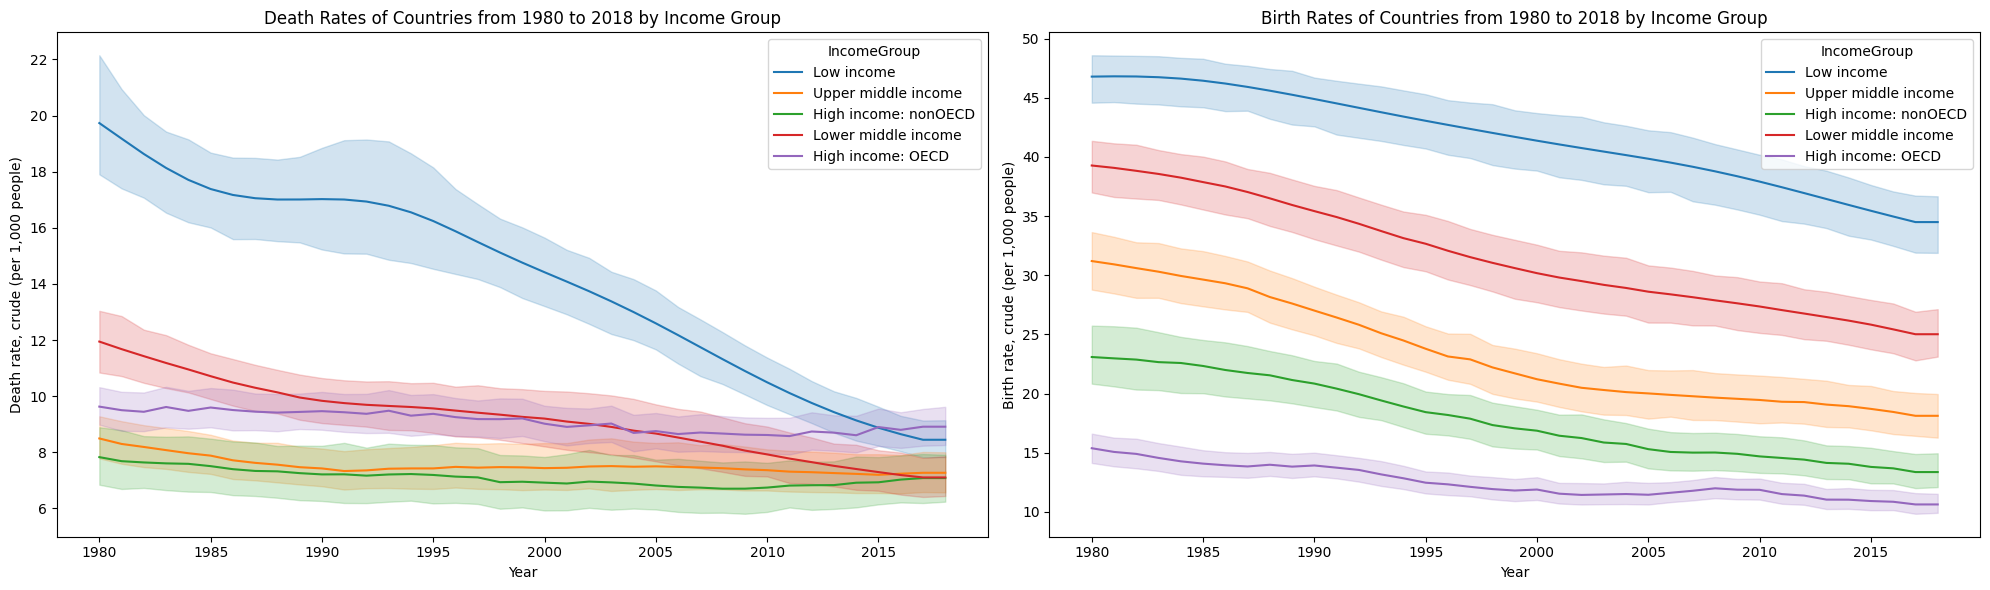

In [13]:
# Assuming df is your DataFrame
df = pd.read_csv('cleaned_data.csv')

# Filter the data for the years 1980 to 2018
df = df[(df['Year'] >= 1980) & (df['Year'] <= 2018)]

# Create the subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

# Create the first line plot for Death Rates
sns.lineplot(data=df, x='Year', y='Death rate, crude (per 1,000 people)', hue='IncomeGroup', ax=axs[0])
axs[0].set_title('Death Rates of Countries from 1980 to 2018 by Income Group')

# Create the second line plot for Birth Rates
sns.lineplot(data=df, x='Year', y='Birth rate, crude (per 1,000 people)', hue='IncomeGroup', ax=axs[1])
axs[1].set_title('Birth Rates of Countries from 1980 to 2018 by Income Group')

plt.tight_layout()
plt.show()

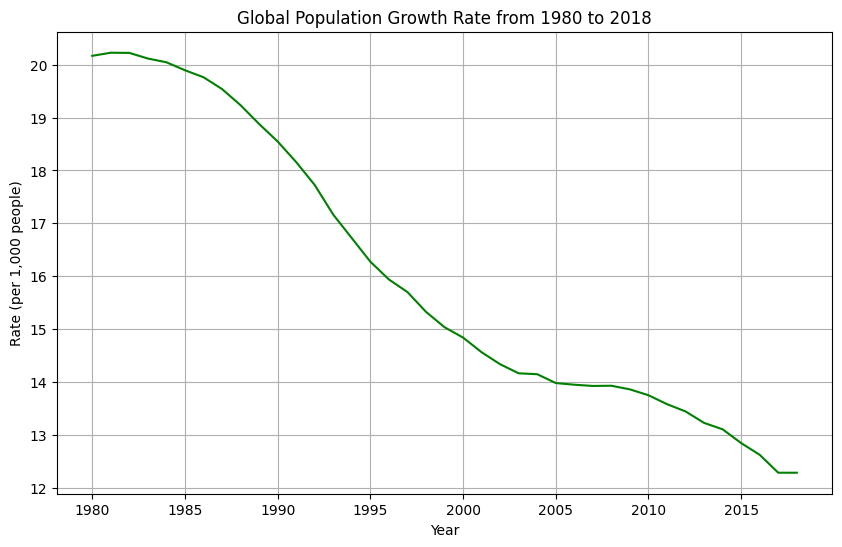

In [14]:
# Population growth is the difference between the birth rate and the death rate. Reference - [https://byjus.com/question-answer/define-population-growth-how-is-it-related-to-birth-rate-and-death-rate/]
# So, I will plot the population growth rate for each year from 1980 to 2018.

# Group the data by year and calculate the average birth rate and death rate for each year
global_data = df.groupby('Year').agg({
    'Birth rate, crude (per 1,000 people)': 'mean',
    'Death rate, crude (per 1,000 people)': 'mean'
}).reset_index()

# Calculate the population growth rate for each year
global_data['Population Growth Rate'] = global_data['Birth rate, crude (per 1,000 people)'] - global_data['Death rate, crude (per 1,000 people)']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(global_data['Year'], global_data['Population Growth Rate'], color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rate (per 1,000 people)')
plt.title('Global Population Growth Rate from 1980 to 2018')

# Add grid
plt.grid(True)

# Show plot
plt.show()

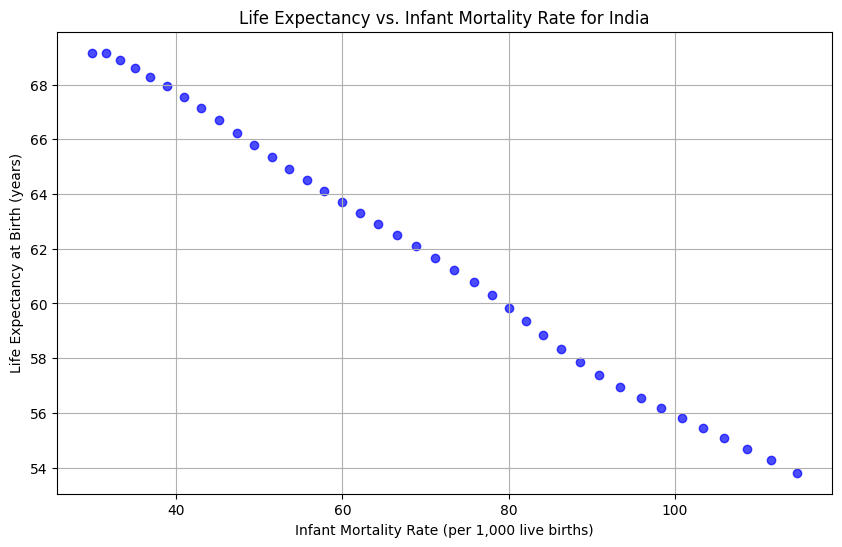

In [15]:
# Filter data for India
india_data = df[df['Country Name'] == 'India']

# Extract relevant columns
life_expectancy = india_data['Life expectancy at birth (years)']
infant_mortality_rate = india_data['Infant mortality rate (per 1,000 live births)']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(infant_mortality_rate, life_expectancy, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Infant Mortality Rate (per 1,000 live births)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.title('Life Expectancy vs. Infant Mortality Rate for India')

# Add grid
plt.grid(True)

# Show plot
plt.show()

In [16]:
regions = filtered_df['Region'].unique()
print(regions)

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'Sub-Saharan Africa' 'Latin America & Caribbean'
 'North America']


In [17]:
income_groups = filtered_df['IncomeGroup'].unique()
print(income_groups)

['Low income' 'Upper middle income' 'High income: nonOECD'
 'Lower middle income' 'High income: OECD']


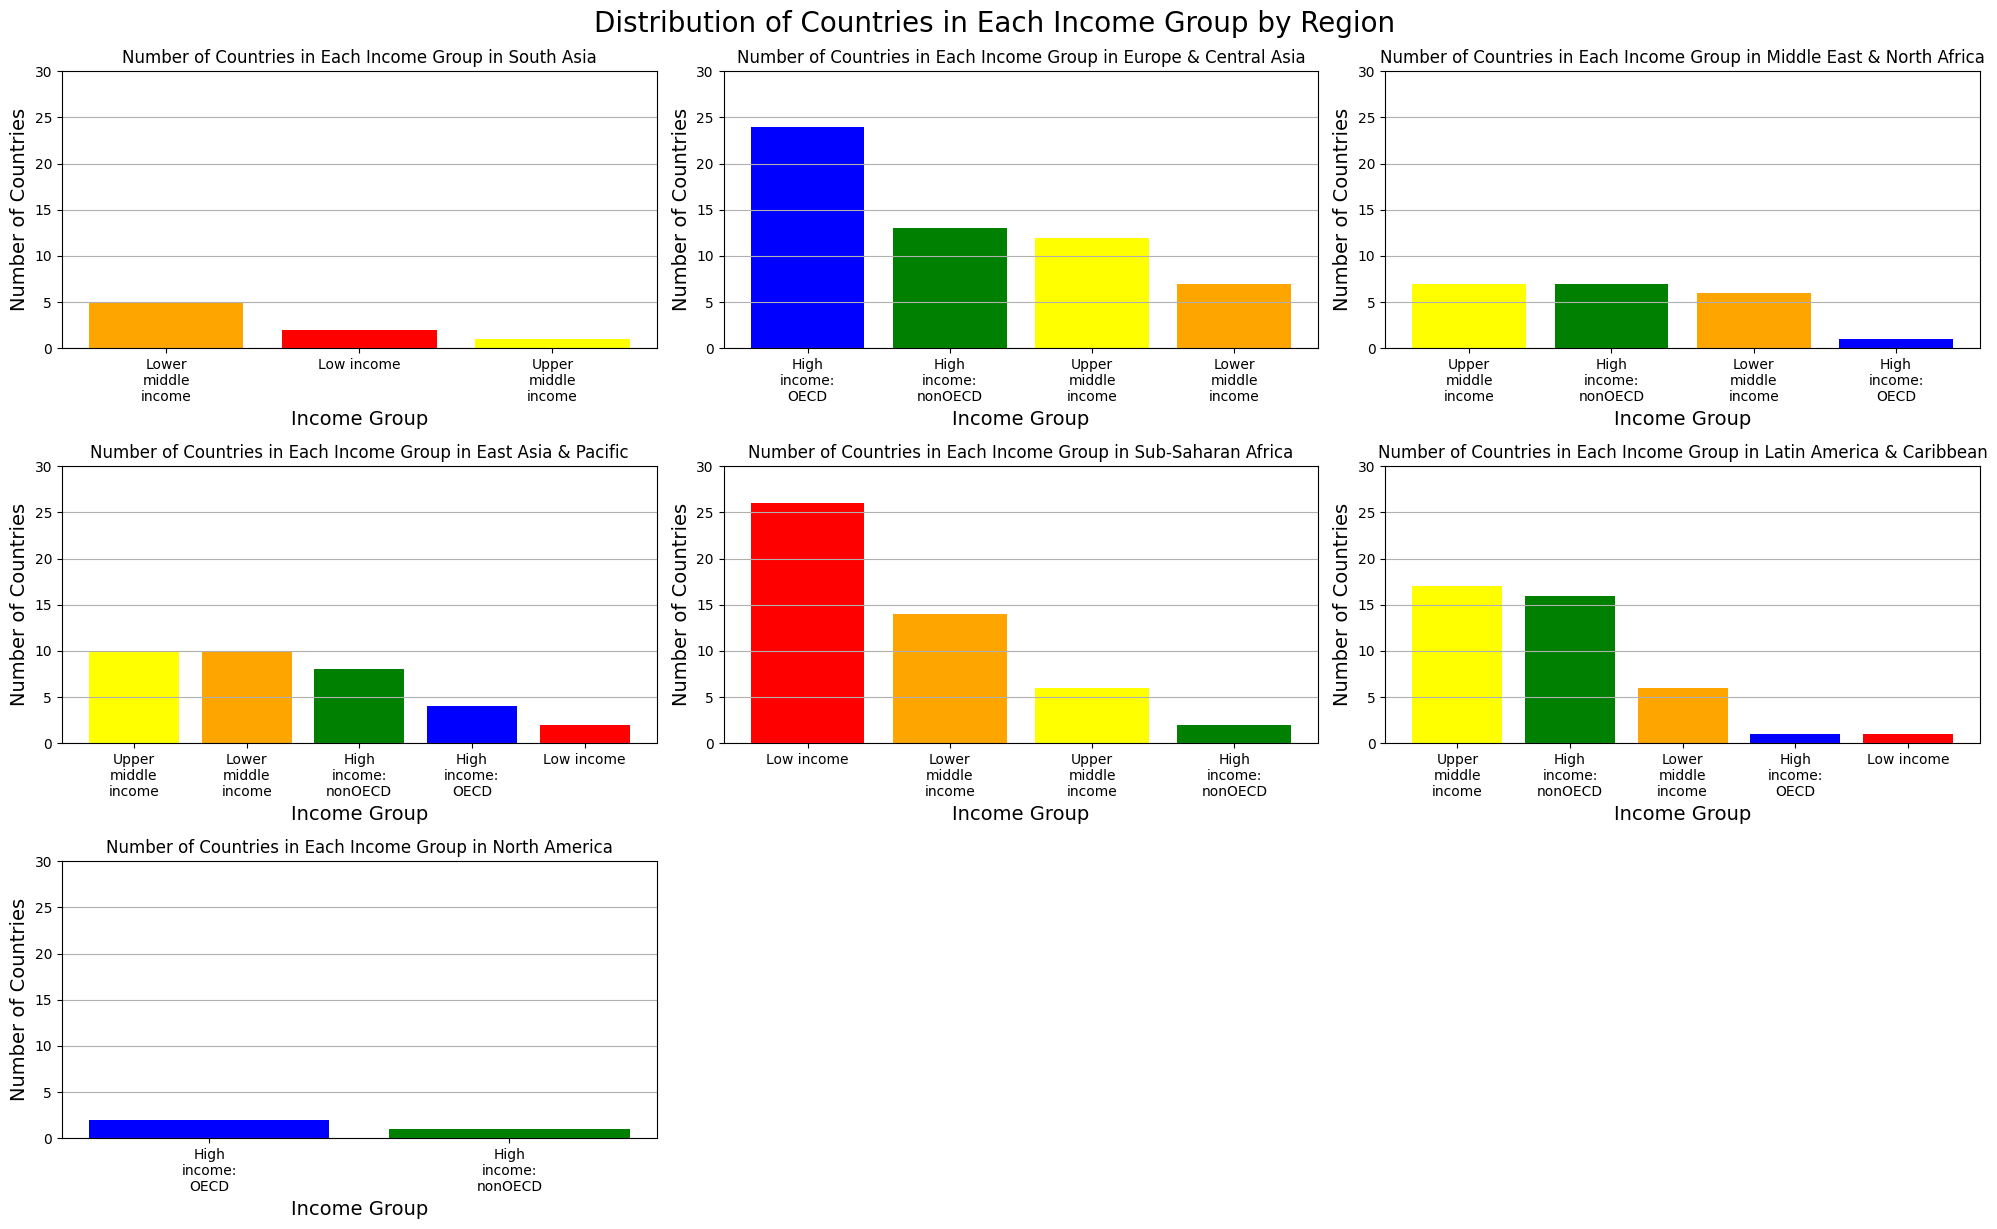

In [18]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))

# Define the color scheme for each income group
colors = {
    'Low income': 'red',
    'Lower middle income': 'orange',
    'Upper middle income': 'yellow',
    'High income: nonOECD': 'green',
    'High income: OECD': 'blue'
}

# Iterate over each region
for i, region in enumerate(regions):
    region_data = filtered_df[filtered_df['Region'] == region]
    unique_count = region_data['Country Name'].nunique()
    
    # Count the number of countries in each income group
    income_counts = region_data['IncomeGroup'].value_counts()
    
    # Create a bar plot for the number of countries in each income group
    ax = axes[i//3, i%3]
    ax.bar(income_counts.index, income_counts/(2018-1980+1), color=[colors[group] for group in income_counts.index])
    ax.set_title(f'Number of Countries in Each Income Group in {region}')
    ax.set_ylabel('Number of Countries', fontsize=14)
    ax.set_xlabel('Income Group', fontsize=14)
    ax.grid(axis='y')

    ax.set_ylim(0, 30)
    
    # Set tick positions and wrap x-axis labels
    ax.set_xticks(range(len(income_counts)))
    ax.set_xticklabels([textwrap.fill(label, width=10) for label in income_counts.index])

# Remove empty subplots
for i in range(7, 9):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
fig.suptitle('Distribution of Countries in Each Income Group by Region', y=1.02, fontsize=20)

# Show plot
plt.show()

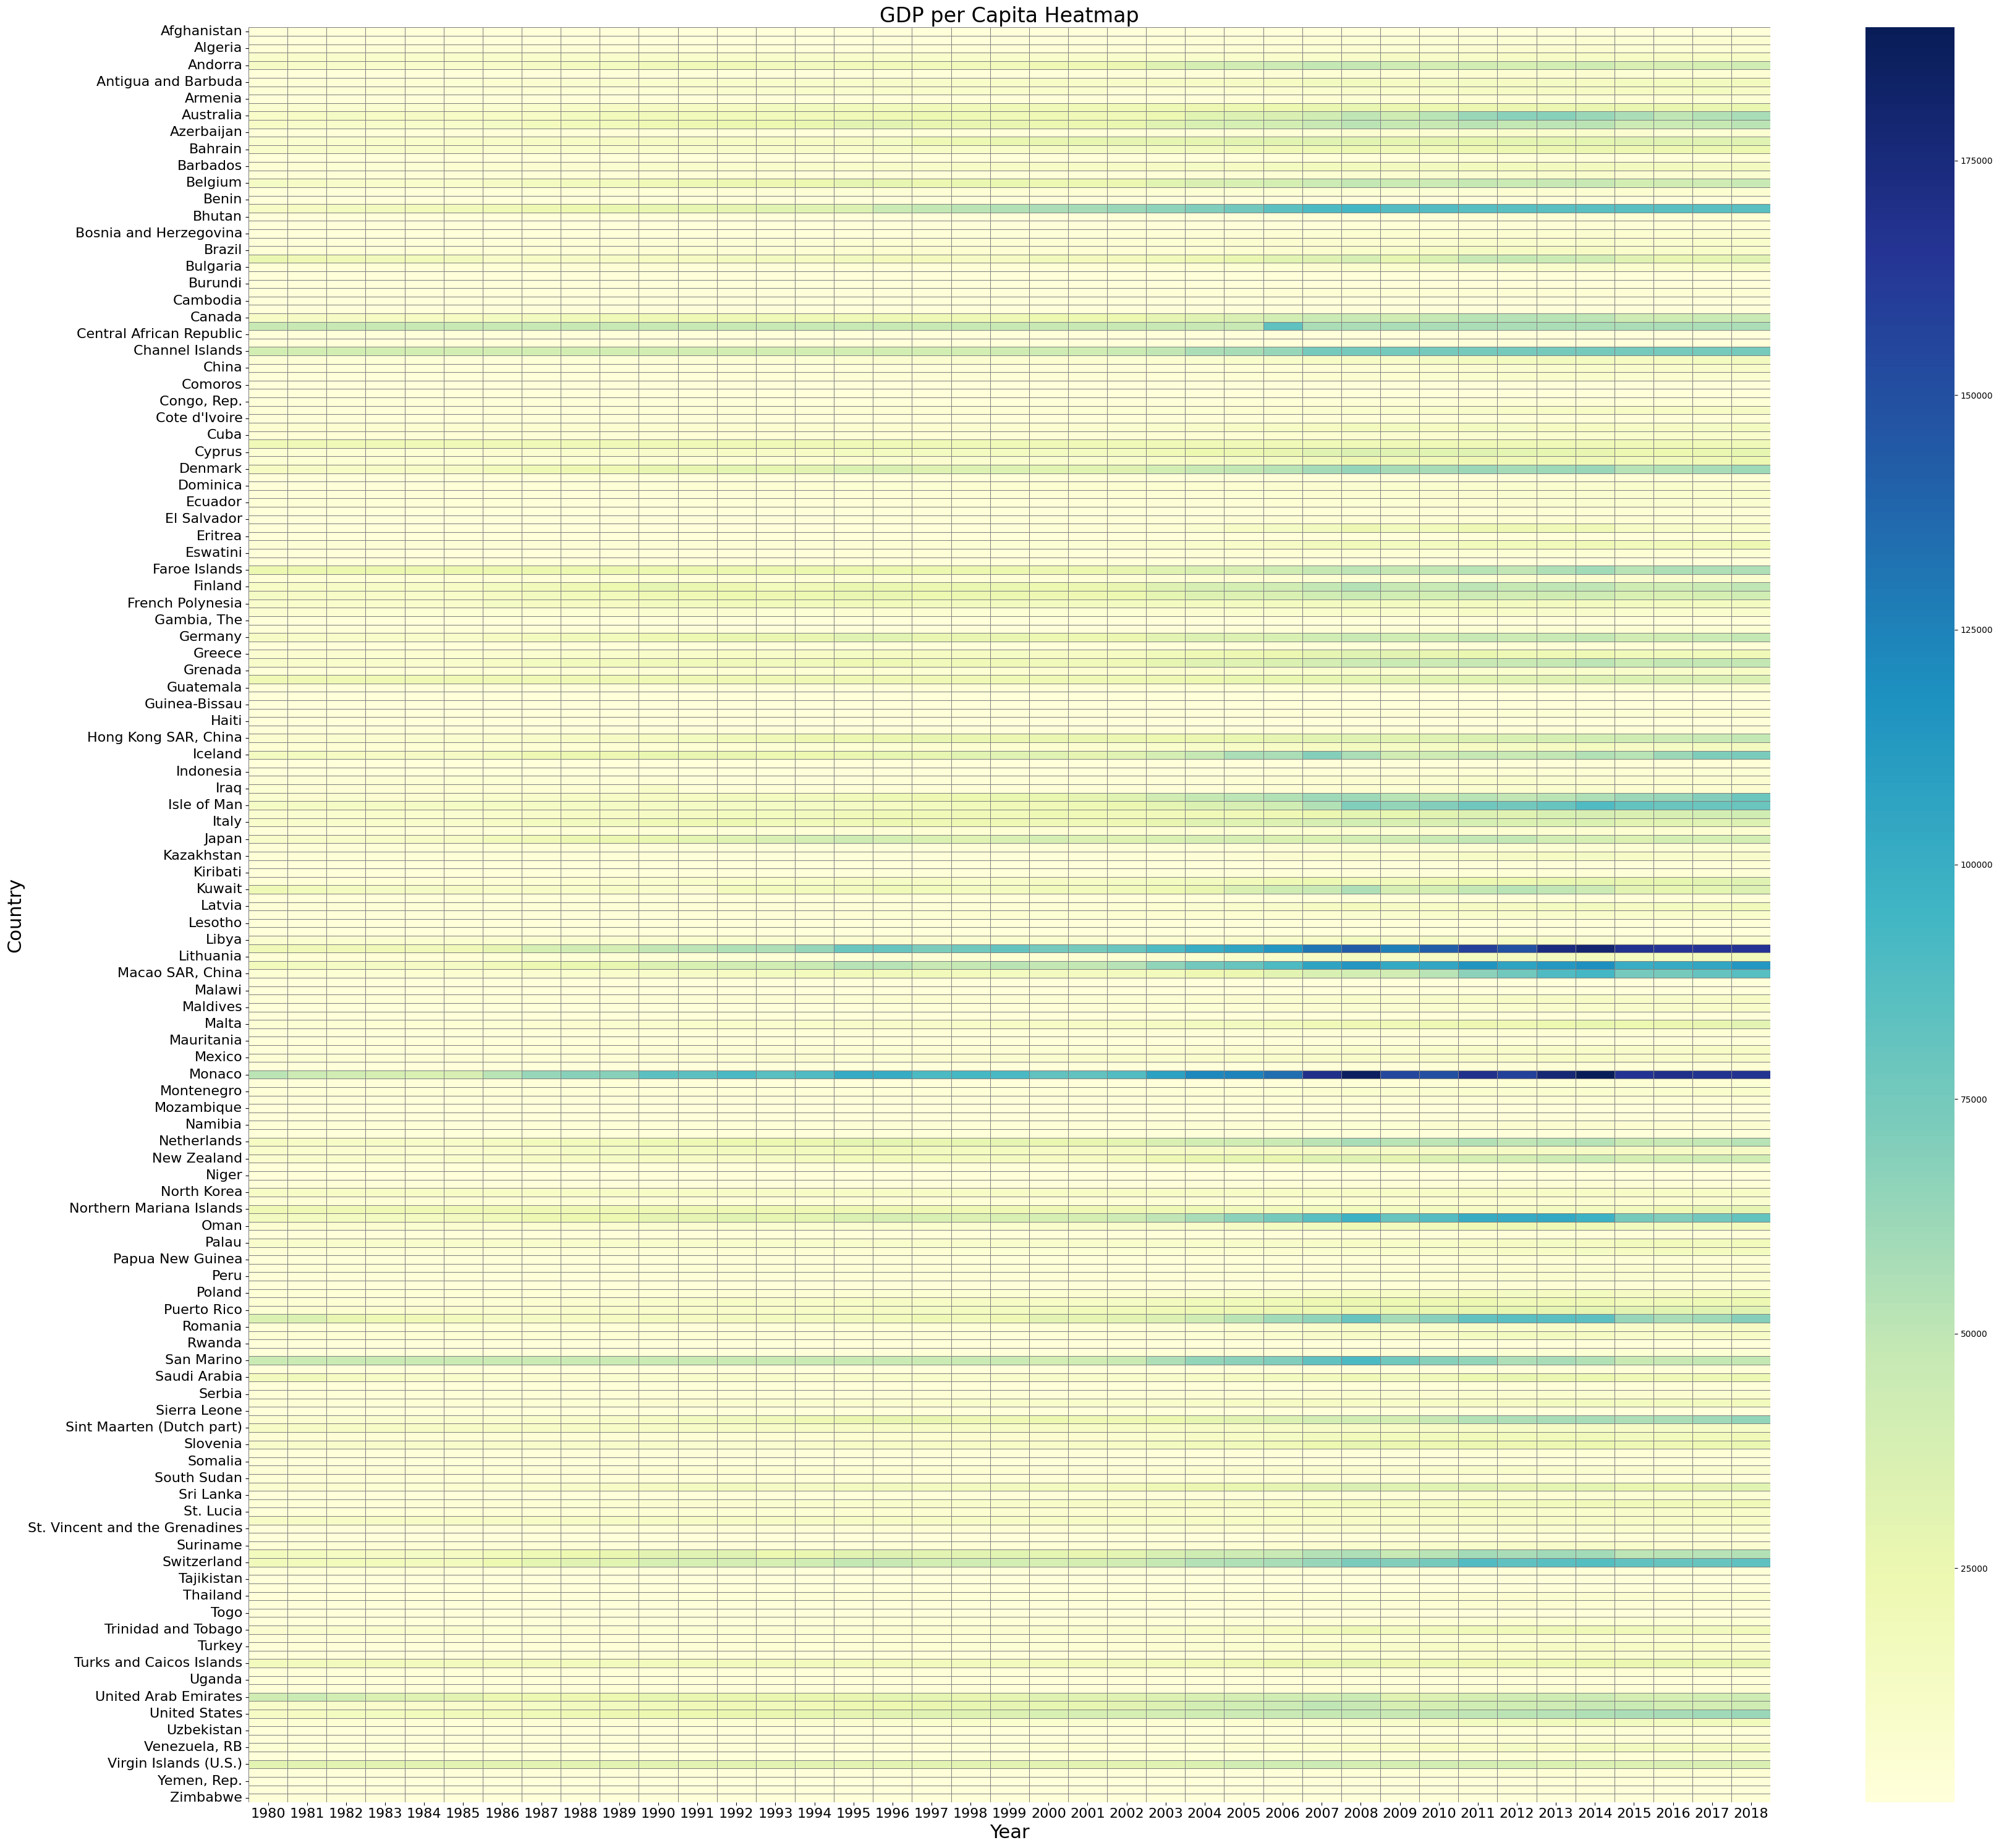

In [19]:
plot_data = df.pivot(index='Country Name', columns='Year', values='GDP per capita (USD)')
# Plotting the heatmap with a larger size and a different color palette
plt.figure(figsize=(35, 30))  # Increase the figure size
sns.heatmap(plot_data, cmap='YlGnBu', linewidths=0.5, linecolor='grey')  # Change the color palette to 'YlGnBu'

# Set labels and title with appropriate font sizes
plt.xlabel('Year', fontsize=22)  # Increase font size for x-axis label
plt.ylabel('Country', fontsize=22)  # Increase font size for y-axis label
plt.title('GDP per Capita Heatmap', fontsize=24)  # Increase font size for title
plt.xticks(fontsize=16)  # Increase font size for x-axis ticks
plt.yticks(fontsize=16)  # Increase font size for y-axis ticks

plt.tight_layout()
plt.show()

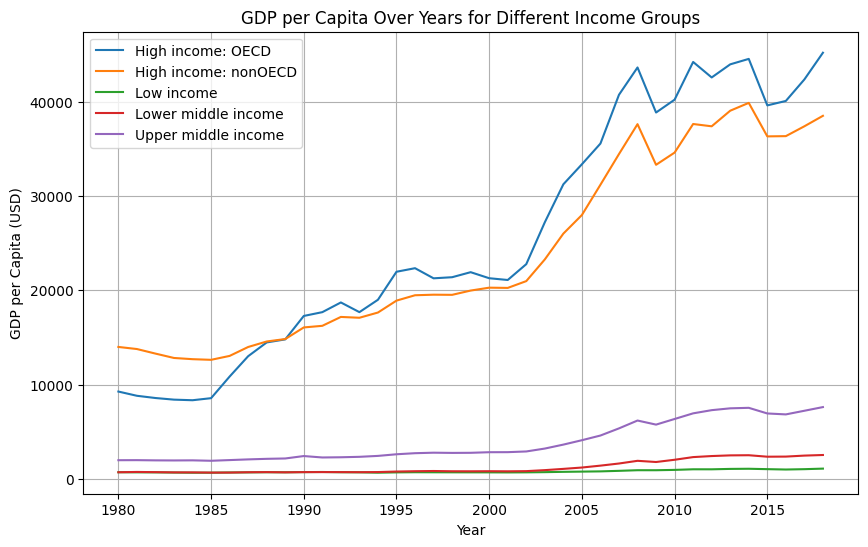

In [20]:
# Income Group Analysis: Analyze how internet usage varies among different income groups
internet_usage_by_income = df.groupby('IncomeGroup')['Individuals using the Internet (% of population)'].mean()

# Compare infant mortality rates among income groups
infant_mortality_by_income = df.groupby('IncomeGroup')['Infant mortality rate (per 1,000 live births)'].mean()

# Plot GDP per capita over the years for different income groups
gdp_per_capita_by_income = df.groupby(['IncomeGroup', 'Year'])['GDP per capita (USD)'].mean()

# Plotting GDP per capita over the years for different income groups
plt.figure(figsize=(10, 6))
for income_group, data in gdp_per_capita_by_income.groupby('IncomeGroup'):
    plt.plot(data.index.get_level_values('Year'), data.values, label=income_group)

plt.title('GDP per Capita Over Years for Different Income Groups')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.legend()
plt.grid(True)
plt.show()


Correlation between electric power consumption and GDP: 0.20420165904253532
Correlation between electric power consumption and population density: 0.027033916981300796


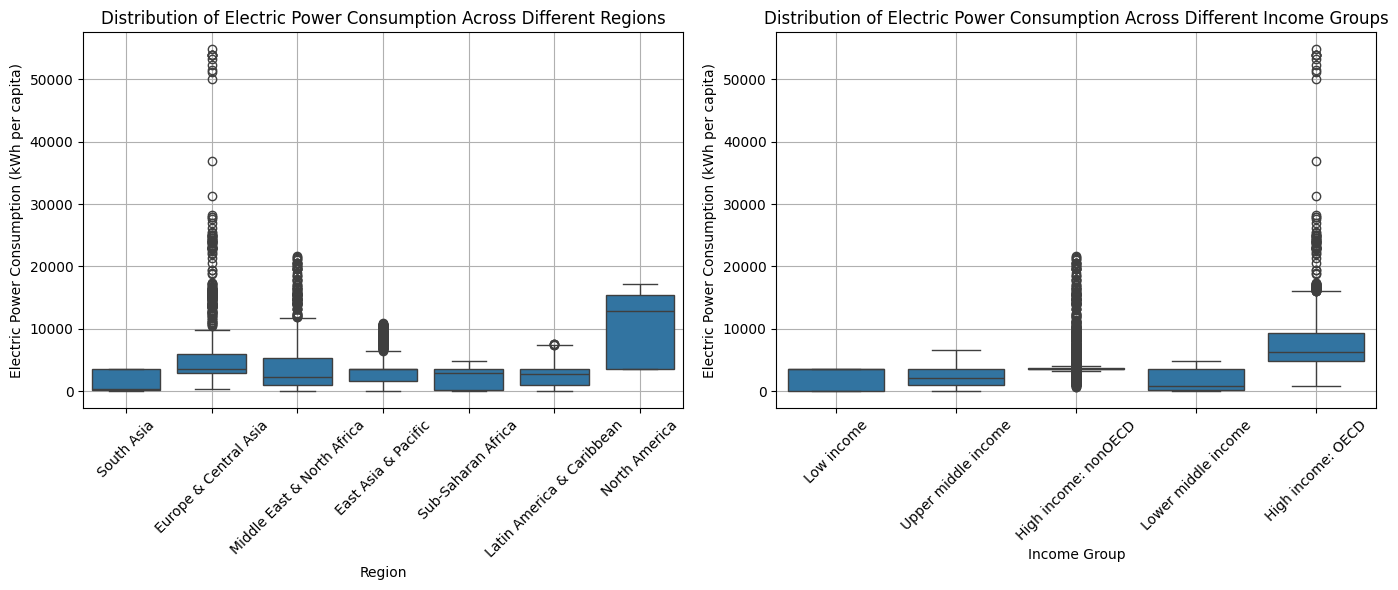

In [21]:
# Electric Power Consumption Analysis: Analyze how electric power consumption correlates with GDP or population density
# Calculate correlation between electric power consumption and GDP
correlation_gdp_power = df['Electric power consumption (kWh per capita)'].corr(df['GDP (USD in billions)'])

# Calculate correlation between electric power consumption and population density
correlation_density_power = df['Electric power consumption (kWh per capita)'].corr(df['Population density (people per sq. km of land area)'])

print("Correlation between electric power consumption and GDP:", correlation_gdp_power)
print("Correlation between electric power consumption and population density:", correlation_density_power)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualize the distribution of electric power consumption across different regions
sns.boxplot(x='Region', y='Electric power consumption (kWh per capita)', data=df, ax=axes[0])
axes[0].set_title('Distribution of Electric Power Consumption Across Different Regions')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Electric Power Consumption (kWh per capita)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Visualize the distribution of electric power consumption across different income groups
sns.boxplot(x='IncomeGroup', y='Electric power consumption (kWh per capita)', data=df, ax=axes[1])
axes[1].set_title('Distribution of Electric Power Consumption Across Different Income Groups')
axes[1].set_xlabel('Income Group')
axes[1].set_ylabel('Electric Power Consumption (kWh per capita)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()


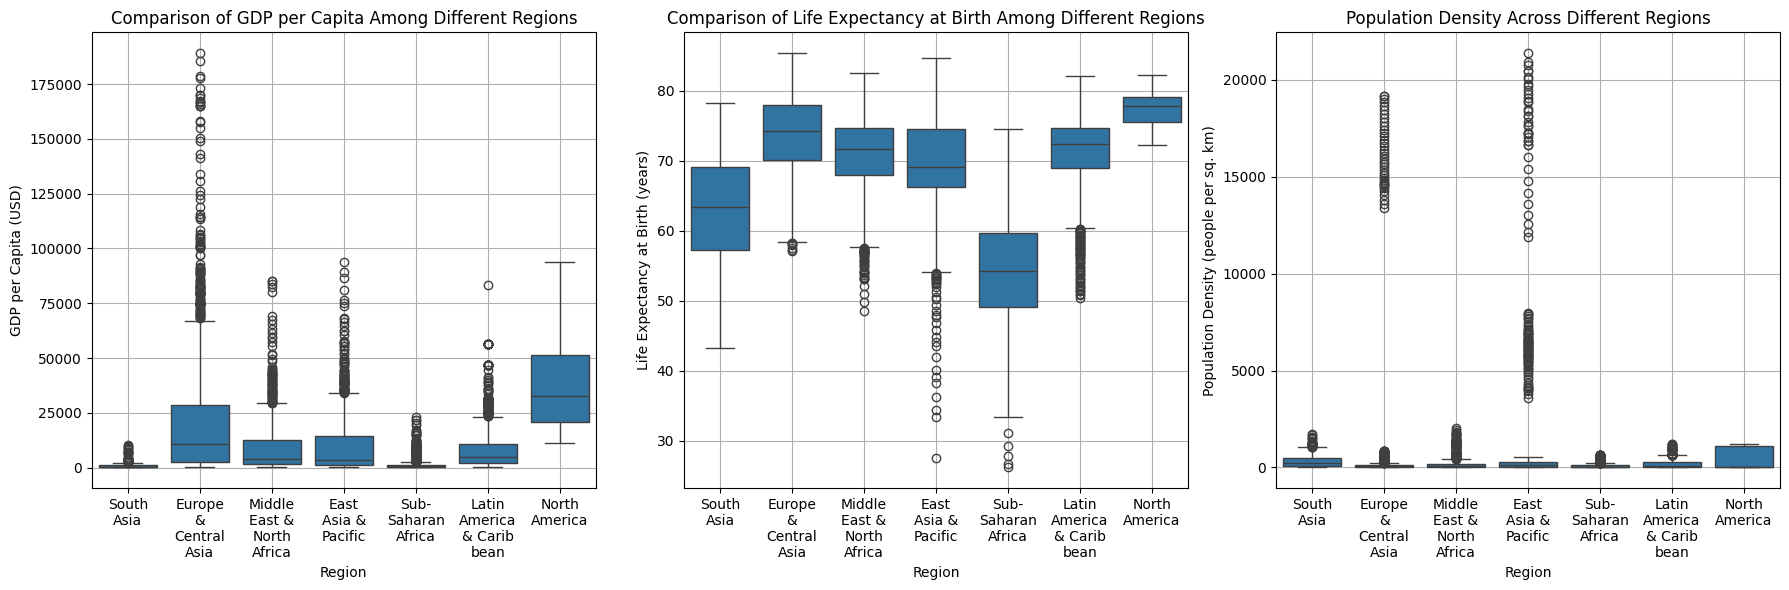

In [39]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

unique_regions = df['Region'].unique()

# Regional Comparisons: Compare GDP per capita among different regions
sns.boxplot(x='Region', y='GDP per capita (USD)', data=df, ax=axes[0])
axes[0].set_title('Comparison of GDP per Capita Among Different Regions')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('GDP per Capita (USD)')
axes[0].set_xticks(range(len(unique_regions)))
axes[0].set_xticklabels([textwrap.fill(label, width=7) for label in unique_regions])
axes[0].tick_params(axis='x')
axes[0].grid(True)

# Regional Comparisons: Compare life expectancy at birth among different regions
sns.boxplot(x='Region', y='Life expectancy at birth (years)', data=df, ax=axes[1])
axes[1].set_title('Comparison of Life Expectancy at Birth Among Different Regions')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Life Expectancy at Birth (years)')
axes[1].set_xticks(range(len(unique_regions)))
axes[1].set_xticklabels([textwrap.fill(label, width=7) for label in unique_regions])
axes[1].tick_params(axis='x')
axes[1].grid(True)

# Regional Comparisons: Plot population density for each region
sns.boxplot(x='Region', y='Population density (people per sq. km of land area)', data=df, ax=axes[2])
axes[2].set_title('Population Density Across Different Regions')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Population Density (people per sq. km)')
axes[2].set_xticks(range(len(unique_regions)))
axes[2].set_xticklabels([textwrap.fill(label, width=7) for label in unique_regions])
axes[2].tick_params(axis='x')
axes[2].grid(True)

plt.tight_layout()
plt.show()


In [23]:
# Calculate the mean GDP for each country
mean_gdp = df.groupby('Country Name')['GDP (USD in billions)'].mean()

# Find the country with the highest average GDP
highest_gdp_country = mean_gdp.idxmax()
highest_gdp_value = mean_gdp.max()

# Find the country with the lowest average GDP
lowest_gdp_country = mean_gdp.idxmin()
lowest_gdp_value = mean_gdp.min()

print("Country with the highest average GDP:")
print(f"{highest_gdp_country}: ${highest_gdp_value:.2f}")

print("\nCountry with the lowest average GDP:")
print(f"{lowest_gdp_country}: ${lowest_gdp_value:.2f}")

Country with the highest average GDP:
United States: $10290.00

Country with the lowest average GDP:
Tuvalu: $0.02


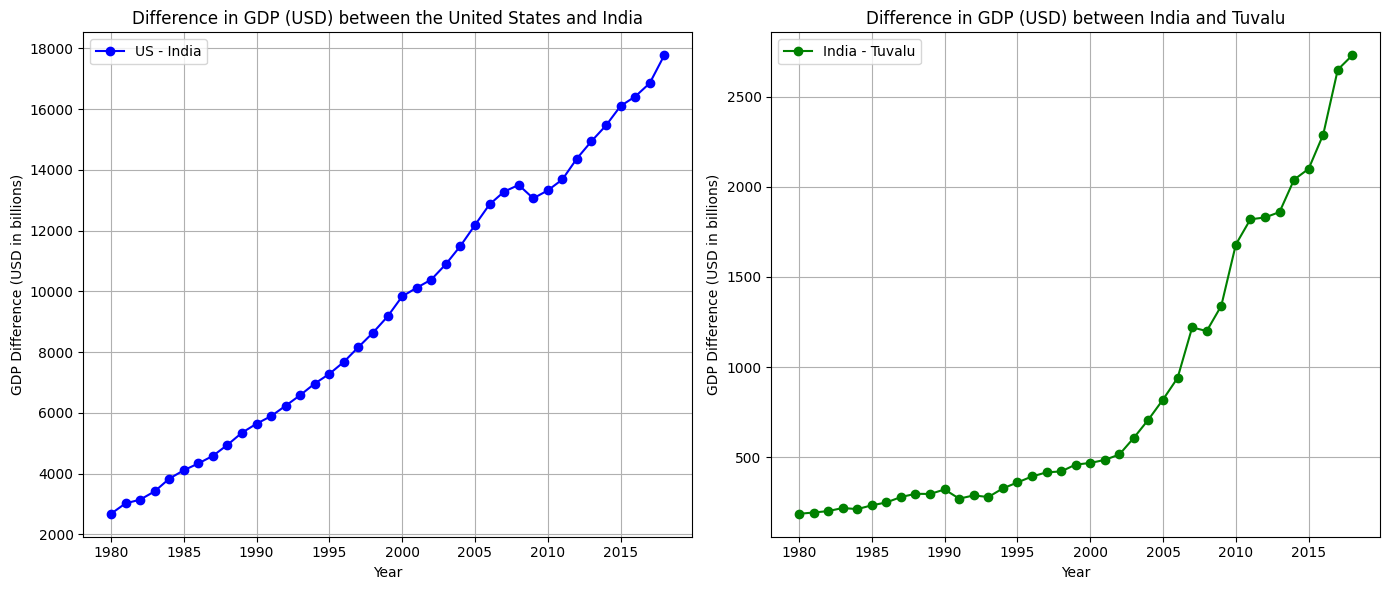

In [24]:
# Initialize lists to store years and GDP differences
years = []
us_india_gdp_differences = []
india_tuvalu_gdp_differences = []

# Iterate over each year
for year in df['Year'].unique():
    # Filter the data for the current year
    data_year = df[df['Year'] == year]
    # Find the GDP of the United States for the current year
    us_gdp = data_year[data_year['Country Name'] == 'United States']['GDP (USD in billions)'].values[0]
    # Find the GDP of India for the current year
    india_gdp = data_year[data_year['Country Name'] == 'India']['GDP (USD in billions)'].values[0]
    # Find the GDP of Tuvalu for the current year
    tuvalu_gdp = data_year[data_year['Country Name'] == 'Tuvalu']['GDP (USD in billions)'].values[0]
    # Calculate the difference in GDP between the United States and India
    us_india_gdp_difference = us_gdp - india_gdp
    # Calculate the difference in GDP between India and Tuvalu
    india_tuvalu_gdp_difference = india_gdp - tuvalu_gdp
    # Append the current year and GDP differences to the lists
    years.append(year)
    us_india_gdp_differences.append(us_india_gdp_difference)
    india_tuvalu_gdp_differences.append(india_tuvalu_gdp_difference)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the graph for difference in GDP between US and India
axs[0].plot(years, us_india_gdp_differences, marker='o', linestyle='-', label='US - India', color='blue')
axs[0].set_title('Difference in GDP (USD) between the United States and India')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('GDP Difference (USD in billions)')
axs[0].grid(True)
axs[0].legend()

# Plot the graph for difference in GDP between India and Tuvalu
axs[1].plot(years, india_tuvalu_gdp_differences, marker='o', linestyle='-', label='India - Tuvalu', color='green')
axs[1].set_title('Difference in GDP (USD) between India and Tuvalu')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GDP Difference (USD in billions)')
axs[1].grid(True)
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [25]:
# Find the country with maximum birth rate
max_birth_country = df.loc[df['Birth rate, crude (per 1,000 people)'].idxmax()]['Country Name']
max_birth_rate = df['Birth rate, crude (per 1,000 people)'].max()

# Find the country with minimum birth rate
min_birth_country = df.loc[df['Birth rate, crude (per 1,000 people)'].idxmin()]['Country Name']
min_birth_rate = df['Birth rate, crude (per 1,000 people)'].min()

# Find the country with maximum death rate
max_death_country = df.loc[df['Death rate, crude (per 1,000 people)'].idxmax()]['Country Name']
max_death_rate = df['Death rate, crude (per 1,000 people)'].max()

# Find the country with minimum death rate
min_death_country = df.loc[df['Death rate, crude (per 1,000 people)'].idxmin()]['Country Name']
min_death_rate = df['Death rate, crude (per 1,000 people)'].min()

print("Country with Maximum Birth Rate:", max_birth_country, "-", max_birth_rate, "per 1,000 people")
print("Country with Minimum Birth Rate:", min_birth_country, "-", min_birth_rate, "per 1,000 people")
print("Country with Maximum Death Rate:", max_death_country, "-", max_death_rate, "per 1,000 people")
print("Country with Minimum Death Rate:", min_death_country, "-", min_death_rate, "per 1,000 people")

Country with Maximum Birth Rate: Niger - 56.686 per 1,000 people
Country with Minimum Birth Rate: Hong Kong SAR, China - 6.9 per 1,000 people
Country with Maximum Death Rate: Cambodia - 43.92 per 1,000 people
Country with Minimum Death Rate: Qatar - 1.127 per 1,000 people


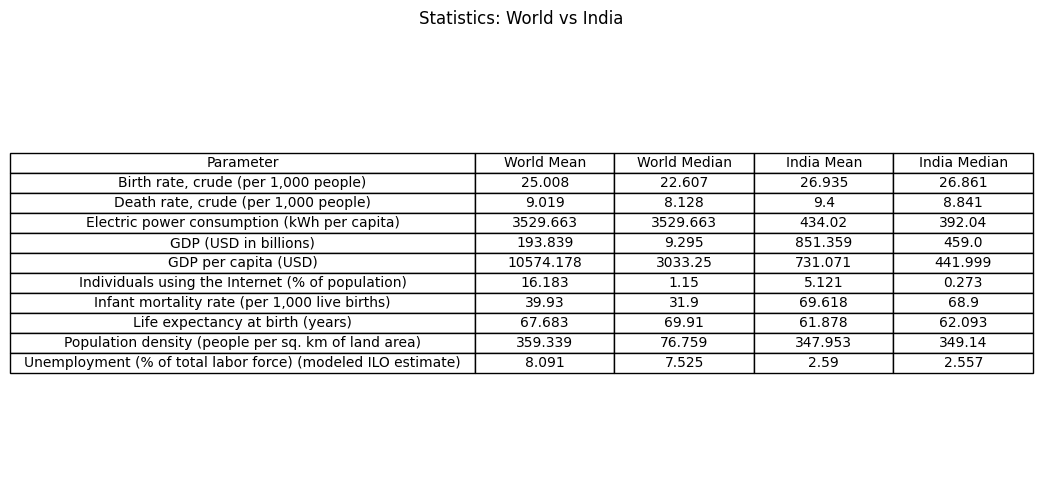

In [26]:
# I want to create a table (display a table using python plots) with the following columns: Parameter, World Mean, India Mean, World Median, India Median. Here parameters are the column names

# Compute mean and median for each parameter for both the world and India
world_mean = [round(df[param].mean(), 3) for param in df.columns[4:]]
world_median = [round(df[param].median(), 3) for param in df.columns[4:]]
india_mean = [round(df[df['Country Name'] == 'India'][param].mean(), 3) for param in df.columns[4:]]
india_median = [round(df[df['Country Name'] == 'India'][param].median(), 3) for param in df.columns[4:]]

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Parameter': df.columns[4:],  # Exclude non-numeric columns
    'World Mean': world_mean,
    'World Median': world_median,
    'India Mean': india_mean,
    'India Median': india_median
})

# Display the table using Matplotlib
plt.figure(figsize=(10, 6))
plt.axis('off')  # Hide axes

table = plt.table(cellText=stats_df.values,
                    colLabels=stats_df.columns,
                    cellLoc='center',
                    loc='center',
                    colWidths=[0.5, 0.15, 0.15, 0.15, 0.15])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust scaling for better readability
plt.title('Statistics: World vs India')
plt.show()

In [27]:
# Calculate the standard deviation of GDP for each country over the years
std_dev_by_country = df.groupby('Country Name')['GDP (USD in billions)'].std()

# Filter the data for the year 2018
gdp_2018 = df[df['Year'] == 2018]

# Calculate the mean GDP for the year 2018
mean_gdp_2018 = gdp_2018['GDP (USD in billions)'].mean()

# Find the country with maximum standard deviation and GDP in 2018 > mean
max_std_dev_country_above_mean = std_dev_by_country[(std_dev_by_country > mean_gdp_2018) & (std_dev_by_country == std_dev_by_country.max())]

# Find the country with maximum standard deviation and GDP in 2018 < mean
max_std_dev_country_below_mean = std_dev_by_country[(std_dev_by_country < mean_gdp_2018)]

# Find the country with minimum standard deviation
min_std_dev_country = std_dev_by_country.idxmin()

# Print the results
print("1. Country with maximum growth in GDP: ")
if not max_std_dev_country_above_mean.empty:
    print("   Country:", max_std_dev_country_above_mean.index[0])
    print("   Standard Deviation:", max_std_dev_country_above_mean.values[0])
else:
    print("   No country found")

print("\n2. Country with maximum decline in GDP:")
if not max_std_dev_country_below_mean.empty:
    print("   Country:", max_std_dev_country_below_mean.index[0])
    print("   Standard Deviation:", max_std_dev_country_below_mean.values[0])
else:
    print("   No country found")

print("\n3. Country with most stagnant GDP:")
print("   Country:", min_std_dev_country)
print("   Standard Deviation:", std_dev_by_country[min_std_dev_country])

1. Country with maximum growth in GDP: 
   Country: United States
   Standard Deviation: 5255.49687169739

2. Country with maximum decline in GDP:
   Country: Afghanistan
   Standard Deviation: 6.4475149838473875

3. Country with most stagnant GDP:
   Country: North Korea
   Standard Deviation: 0.0


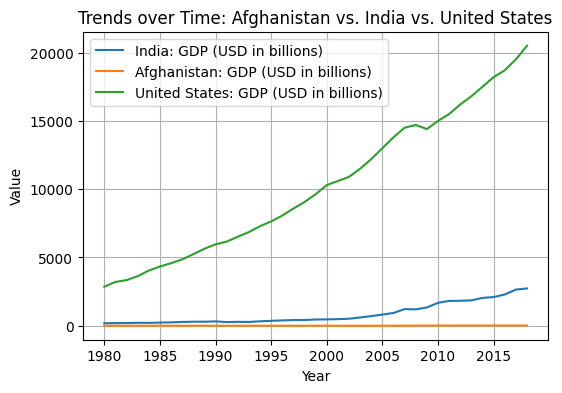

In [28]:
# Filter data for Afghanistan, India, and the US
countries = ['Afghanistan', 'India', 'United States']
filtered_data = df[df['Country Name'].isin(countries)]

# Select columns for plotting
columns_to_plot = ['Year', 'GDP (USD in billions)', 'GDP per capita (USD)', 
                   'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)',
                   'Individuals using the Internet (% of population)']

# Plot trends over time
plt.figure(figsize=(6, 4))

india_data = filtered_data[filtered_data['Country Name'] == 'India']
afghanistan_data = filtered_data[filtered_data['Country Name'] == 'Afghanistan']
us_data = filtered_data[filtered_data['Country Name'] == 'United States']

plt.plot(india_data['Year'], india_data['GDP (USD in billions)'], label='India: GDP (USD in billions)')
plt.plot(afghanistan_data['Year'], afghanistan_data['GDP (USD in billions)'], label='Afghanistan: GDP (USD in billions)')
plt.plot(us_data['Year'], us_data['GDP (USD in billions)'], label='United States: GDP (USD in billions)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends over Time: Afghanistan vs. India vs. United States')
plt.legend()

# Add grid
plt.grid(True)

# Show plot
plt.show()

In [29]:
world_gdp = df.groupby('Year')['GDP (USD in billions)'].sum()

# Calculate the trimmed mean for world GDP
trimmed_mean_gdp = trim_mean(world_gdp, proportiontocut=0.1)  # Adjust the proportiontocut as needed

# Print the trimmed mean for world GDP
print("Trimmed mean for world GDP:", trimmed_mean_gdp)

Trimmed mean for world GDP: 39749.930060606064


In [30]:
# Assuming you have a DataFrame named 'df' containing your dataset
gdp_range = df['GDP (USD in billions)'].max() - df['GDP (USD in billions)'].min()

# Print the range of GDP
print("Range of GDP:", gdp_range)

Range of GDP: 20499.991


In [31]:
# Step 1: Arrange GDP (per capita) values
gdp_per_capita_values = df['GDP per capita (USD)'].values
sorted_gdp_per_capita = np.sort(gdp_per_capita_values)

# Step 2: Find the median
median_gdp_per_capita = np.median(sorted_gdp_per_capita)

# Step 3: Split the data
lower_half = sorted_gdp_per_capita[sorted_gdp_per_capita < median_gdp_per_capita]
upper_half = sorted_gdp_per_capita[sorted_gdp_per_capita > median_gdp_per_capita]

# Step 4: Calculate Q1 (first quartile)
q1 = np.median(lower_half)

# Step 5: Calculate Q3 (third quartile)
q3 = np.median(upper_half)

# Step 6: Calculate the interquartile range (IQR)
iqr = q3 - q1

print("First Quartile (Q1):", q1)
print("Third Quartile (Q3):", q3)
print("Average GDP(per capita) around world:", iqr)

First Quartile (Q1): 831.859
Third Quartile (Q3): 12465.75
Average GDP(per capita) around world: 11633.891
